# MSiA 400 - Final Project
## EDA: Aggregated data
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Cheng

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 

PostgreSQL connection is closed


/tmp/ipykernel_581615/2123096504.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);


In [3]:
unemployee = pd.read_csv("UNRATE.csv")
cpi = pd.read_csv("cpi.csv")
dff = pd.read_csv("DFF.csv")
df['saledate']= pd.to_datetime(df['saledate'])
cpi['DATE']= pd.to_datetime(cpi['DATE'])
unemployee['DATE']= pd.to_datetime(unemployee['DATE'])
dff['DATE']= pd.to_datetime(dff['DATE'])
df_combined = pd.merge(df.assign(grouper=df['saledate'].dt.to_period('M')),
               cpi.assign(grouper=cpi['DATE'].dt.to_period('M')),
               how='left', on='grouper')

df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('M')),
               unemployee.assign(grouper=unemployee['DATE'].dt.to_period('M')),
               how='left', on='grouper')

df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('D')),
               dff.assign(grouper=dff['DATE'].dt.to_period('D')),
               how='left', on='grouper')

df_combined

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,ndept,nvendors,avgvendorsstore,grouper,DATE_x,CORESTICKM159SFRBATL,DATE_y,UNRATE,DATE,DFF
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,58,852,2,2004-08-01,2004-08-01,2.257729,2004-08-01,5.4,2004-08-01,1.29
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,58,827,2,2004-08-02,2004-08-01,2.257729,2004-08-01,5.4,2004-08-02,1.28
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,58,842,2,2004-08-03,2004-08-01,2.257729,2004-08-01,5.4,2004-08-03,1.24
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,58,843,2,2004-08-04,2004-08-01,2.257729,2004-08-01,5.4,2004-08-04,1.22
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,58,870,2,2004-08-05,2004-08-01,2.257729,2004-08-01,5.4,2004-08-05,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,60,944,2,2005-08-23,2005-08-01,2.264406,2005-08-01,4.9,2005-08-23,3.49
385,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,60,1041,3,2005-08-24,2005-08-01,2.264406,2005-08-01,4.9,2005-08-24,3.50
386,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,60,1019,3,2005-08-25,2005-08-01,2.264406,2005-08-01,4.9,2005-08-25,3.55
387,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,60,1056,3,2005-08-26,2005-08-01,2.264406,2005-08-01,4.9,2005-08-26,3.54


In [4]:
def time_series_plot(df_combined, col):
    df_groupyed = df_combined
    color_pal = sns.color_palette()
    # set df index as date
    df_ts = df_groupyed.set_index('saledate')
    df_ts.index = pd.to_datetime(df_ts.index)
    # check distribution of revenue (no pattern found)
    df_ts_draw = df_ts[col]
    df_ts_draw.plot.line(
        figsize=(15, 5),
        color=color_pal[0],
        title=col)
    plt.show()


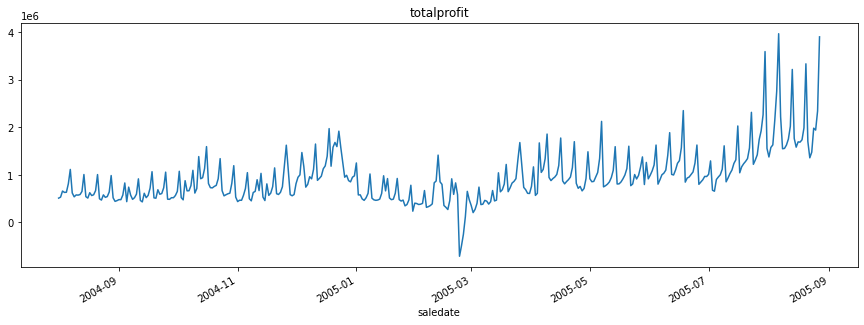

In [5]:
# total profit number
time_series_plot(df_combined, 'totalprofit')


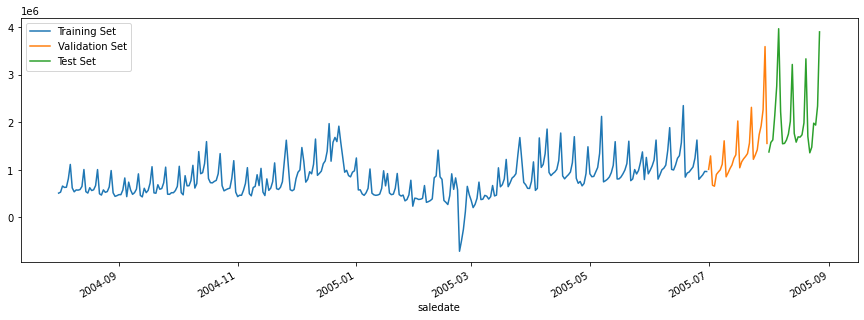

In [26]:
df_ts = df_combined
df_ts = df_ts.set_index('saledate')
# df_ts.loc['2005-07-30', 'totalprofit'] = df_ts.loc['2005-07-29', 'totalprofit']
leftout = df_ts.loc[df_ts.index >= '08-01-2005']
df_ts = df_ts.loc[df_ts.index < '08-01-2005']
# train_test split
train = df_ts.loc[df_ts.index < '07-01-2005']
test = df_ts.loc[df_ts.index >= '07-01-2005']
# plot the train test dataset
train_ts_draw = train["totalprofit"]
test_ts_draw = test["totalprofit"]
leftout = leftout["totalprofit"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set')
test_ts_draw.plot(ax=ax, label='Validation Set')
leftout.plot(ax=ax, label='Final Test Set')

ax.legend(['Training Set', 'Validation Set', 'Test Set'])
plt.show()

We can see that there are seaonality for total profit in this dataset. 
The general trend is approximately staionary. The profits after 2005-07 has a slighly upward trend.

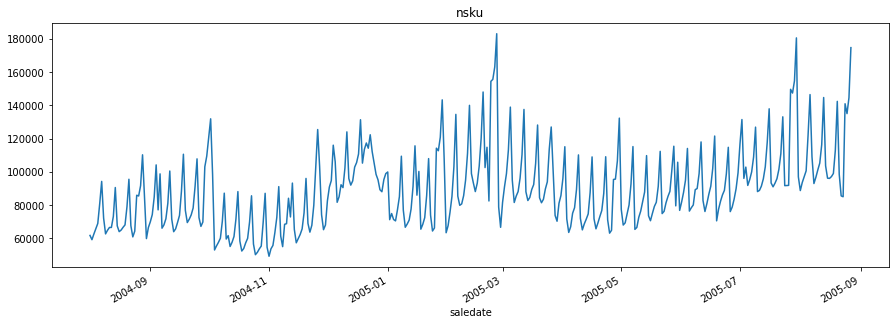

In [6]:
# total profit number
time_series_plot(df_combined, 'nsku')

The number of in-stock items is approximately stationary. It changes with the season, suggesting Dillard's may have different inventory plans for different seasons to cope with different demands. 

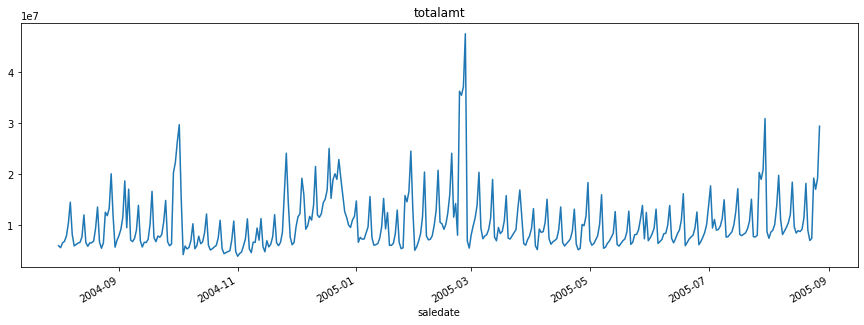

In [7]:
time_series_plot(df_combined, 'totalamt')


The total amount that customers are paying for Dillard's is stationary; however, it has seasonalities. 
It suggests that customers have similar purchase habit through out the year. Customers are still paying similar amount of money for Dillard's. 

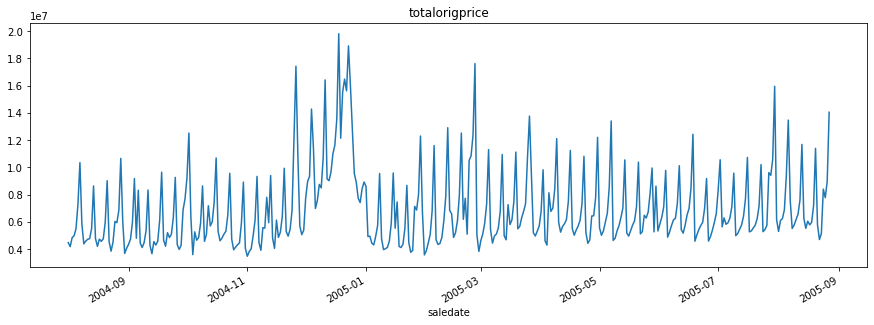

In [8]:
time_series_plot(df_combined, 'totalorigprice')

The original cost is assumed to be the suggested price. We can see that the sugguested price remain stationary over the years. However, it has very large violitility. It can be caused by supply changes and macroeconomic changes. 

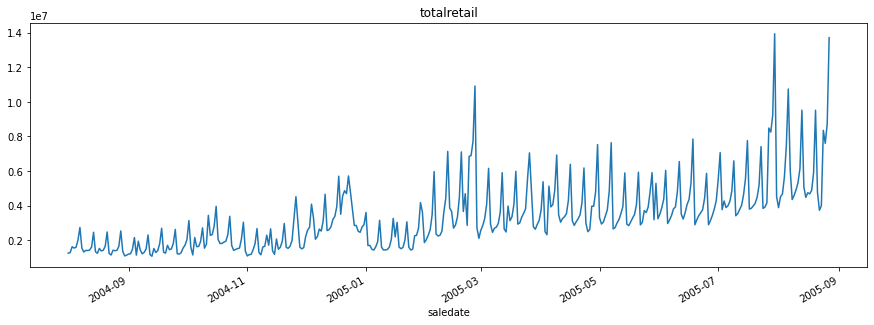

In [9]:
time_series_plot(df_combined, 'totalretail')

The retail price is the price customers pay for Dillard's. 
The retail price gradually increasing. We suspect this can be due to inflation. We will include an inflation index for our model to adjust for macroeconomic changes. 
Also, the retail price has similar trends with original price, which is an indicator that these price change can be brought by macroeconomic changes. 

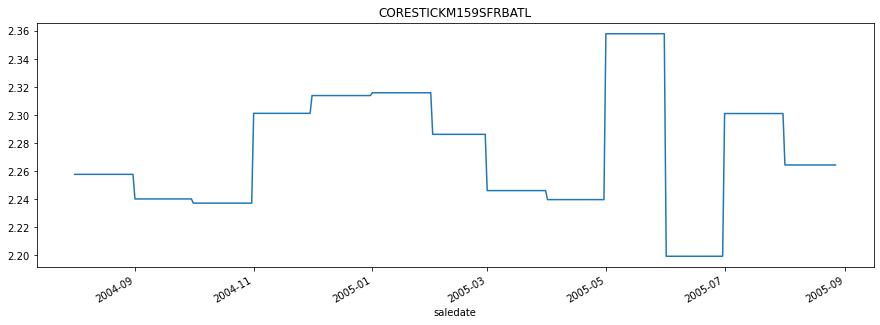

In [12]:
time_series_plot(df_combined, 'CORESTICKM159SFRBATL') # cpi data

The inflation rate is around 2%, which is fairly close to feds inflation target. The economy is not overly heated or in a recession. 

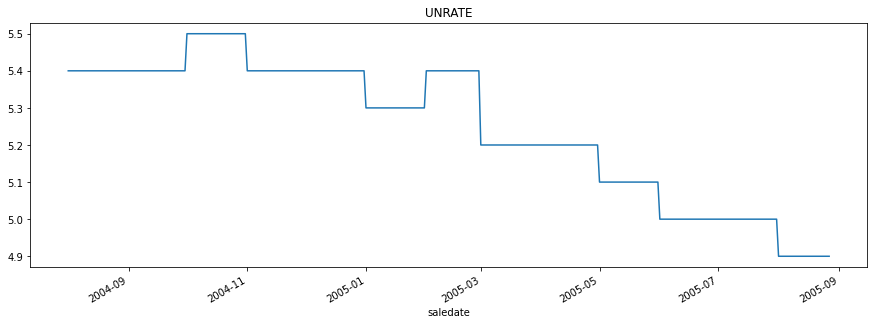

In [16]:
time_series_plot(df_combined, 'UNRATE') # unemployeement


The unemployee rate is dropping during this period of time, which suggests that the economy is expanding. 

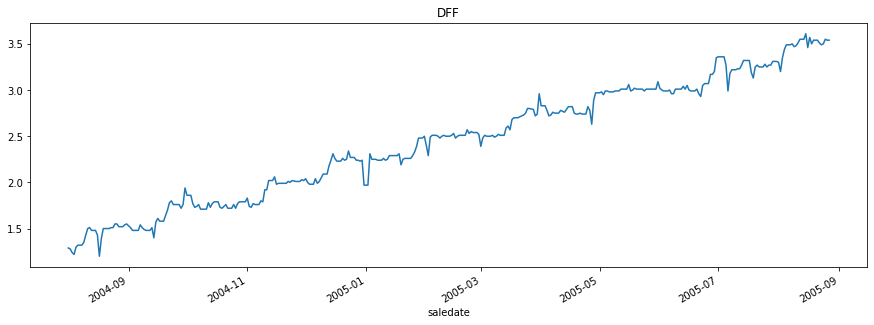

In [17]:
time_series_plot(df_combined, 'DFF') # Interest Rate


The intrersting is rising from 1.5 to 3.5 from 2004-09 and 2005-09. It shows that the economy is growing quickly and the FED is worrying about economy become overheated. 

Text(0, 0.5, 'Counts')

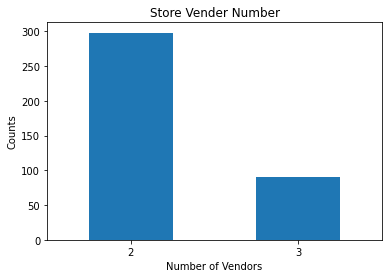

In [10]:
df_combined['avgvendorsstore'].value_counts().plot(kind='bar', rot=0,)
plt.title("Store Vender Number")
plt.xlabel("Number of Vendors")
plt.ylabel("Counts")

Stores only has limited number of vendors for all the products they have. The number of vendors can be a weak indicators for how many SKU the store has and how much profit it is making.